##  NN Implementation (II)

    Create NN using Keras

In [19]:
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
keras.__version__

'2.10.0'

## 1. Load the MNIST handwritten digits dataset

    -- MNIST handwritten, 60k 28*28 grayscale images of the 10 digits, along with a test set of 10k images
    -- dataset description: http://yann.lecun.com/exdb/mnist/
    
<img src="mnist_hw.jpeg" alt="drawing" width="400"/>

In [21]:
#load dataset 
(x_train_0, y_train), (x_test_0, y_test) = keras.datasets.mnist.load_data()

#each data sample is a 28x28 image, each target is the expected number/image label
# reshapes to conv imgs of 28x28 -> 1x784 vectors
# 60,000 total images
x_train = np.reshape(x_train_0, [x_train_0.shape[0], x_train_0.shape[1] * x_train_0.shape[2]])
x_test = np.reshape(x_test_0, [x_test_0.shape[0], x_test_0.shape[1] * x_test_0.shape[2]])

# data normalization - convs all pixel vals from [0, 255] -> [0, 1] (greyscale)
x_train_1 = x_train/255
x_test_1 = x_test/255

print('Training set 0: {} and Training Targets: {}'.format(x_train_0.shape, y_train.shape))
print('Training set after conversion: {} and Training Targets: {}'.format(x_train.shape, y_train.shape))
print('Test set: {} and test targets: {}'.format(x_test.shape, y_test.shape))

Training set 0: (60000, 28, 28) and Training Targets: (60000,)
Training set after conversion: (60000, 784) and Training Targets: (60000,)
Test set: (10000, 784) and test targets: (10000,)


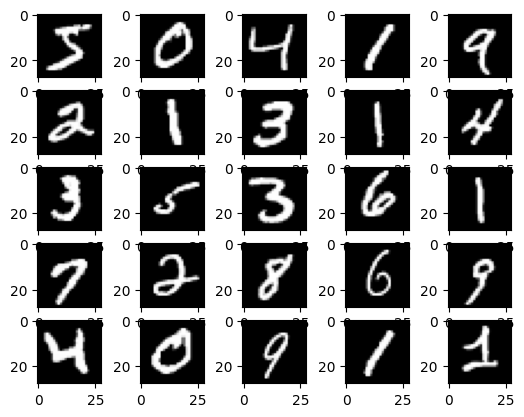

Image labels: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1]


In [22]:
#show first 25 images 
# many same digits w/ diff rot 
nImg = 5
for i in range(nImg*nImg):
    plt.subplot(nImg, nImg, i+1)
    plt.imshow(x_train_0[i], cmap = 'Greys_r')
plt.show()

print('Image labels:', y_train[:25])

## 2. Handwritten digits classification using our linear regression and GD

In [23]:
##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:m*n
    w: weights
    
    return Y_hat
    '''
    # Prediction
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = 1/2* np.sum(np.square(Y - Y_hat))
    
    return loss

# Optimization: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr*gradient        
        gradient = A.T.dot(np.dot(A, w)-b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

In [24]:
# 2. training step using linear regression
# doesn't converge, gets bigger 
# so added 3 zeros to get way smaller lr, so it starts converging
# could use more generations to allow it to converge
# possibly incr max_iter to get better performance
w_star, loss_hist, w_hist = GD(x_train_1, y_train, lr = 0.0000001, delta = 0.01, max_iter = 50)

#785 aparms for w_star bc 784 input vectors

0 loss: 82843822.58813028
1 loss: 49301284.15729847
2 loss: 29598671.753585316
3 loss: 18016299.826769076
4 loss: 11198712.871677877
5 loss: 7177410.363117453
6 loss: 4797537.931248444
7 loss: 3381561.3110284996
8 loss: 2531963.880123172
9 loss: 2015501.0056377987
10 loss: 1695298.886150708
11 loss: 1491020.89619174
12 loss: 1355499.4572148744
13 loss: 1261027.2512666732
14 loss: 1191314.9972053645
15 loss: 1136773.4645352305
16 loss: 1091745.623024104
17 loss: 1052882.8247128688
18 loss: 1018192.1255597491
19 loss: 986477.3286699225
20 loss: 957011.0043606596
21 loss: 929342.0142710834
22 loss: 903182.5311600828
23 loss: 878341.6974629614
24 loss: 854686.6472407829
25 loss: 832119.583654223
26 loss: 810564.278155512
27 loss: 789958.099592003
28 loss: 770247.2899895781
29 loss: 751384.1474457786
30 loss: 733325.3301592453
31 loss: 716030.8203906539
32 loss: 699463.2776788893
33 loss: 683587.62241382
34 loss: 668370.7564459222
35 loss: 653781.36588955
36 loss: 639789.7738536125
37 loss:

In [25]:
# 3. model evaluation using error rate (# error samples/# of total samples)
y_train_pred = np.round(predict(x_train_1, w_star))
y_test_pred = np.round(predict(x_test_1, w_star))

#comp first 10
print(y_train_pred[0:10], y_train[0:10])
print(y_test_pred[0:10], y_test[0:10])

#isn't supposed to give negative numbers

#calc number of incorrect predictions
incorrectTrainPreds = np.sum( y_train_pred != y_train ) 
#div by tot number of images
train_error = incorrectTrainPreds / 60_000
#output percent of wrong
print('Error rate of training set: ', round(train_error, 4)*100, '%')

#calc number of incorrect predictions
incorrectTestPreds = np.sum( y_test_pred != y_test ) 
#div by tot number of images
test_error = incorrectTestPreds / 60_000
#output percent of wrong
print('Error rate of test set: ', round(test_error, 4)*100, '%')

#so, can't use linear regression since real relationship possibly not linear
# don't need to make this linear assumption if use NN (could be linear or nonlinear)


[ 8. -1. 11.  0.  3.  3.  2.  1.  1.  5.] [5 0 4 1 9 2 1 3 1 4]
[ 7.  7. -0. -2.  2.  1.  6.  7.  6.  7.] [7 2 1 0 4 1 4 9 5 9]
Error rate of training set:  86.98 %
Error rate of test set:  14.46 %


## 3. Using NNs for handwritten digits classification

#### Generate the one-hot vector for the training targets

In [32]:
#784 inputs so that many input nodes

#convs label into one hot vect
y_train_onehot = keras.utils.to_categorical(y_train)

#print first 5 vals for comparison
print(y_train[:5])
y_train_onehot[:5]

[5 0 4 1 9]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

#### Create an NN using keras

In [34]:
# Create a feedforward NN: 1 hidden layers with 50 hidden unites with sigm activation,
# and one output layer with 10 units for the 10 classes

# NN is a seq model in keras bc nodes linked seqly
# creates empty model
model = keras.models.Sequential()

#add hidden layer
model.add(keras.layers.Dense( #dense layer is fully connected
    units = 50,
    input_dim = 784, #bc this many ins, input layer auto added thru this bc no calc needed
    activation = 'sigmoid' #softmax funct
    #can init starting weights too
))

#add out layer
model.add(keras.layers.Dense(
    units = 10,
    input_dim = 50, #units of prev layer
    activation = 'softmax'
))

optimization_funct = keras.optimizers.SGD(
    learning_rate = 0.001, #pretty large, but auto decays in SGD
    decay = 1e-7, #decay rate of lr
    momentum = 0.9
)

#loss funct connected to optimization funct
model.compile(
    optimizer=optimization_funct, 
    loss = keras.losses.CategoricalCrossentropy() #'categoric_crossentropy'
)

#50x784 = params to hidden layer, 50 additional due to bias
#50x10 = params to out layer, 10 additional due to bias
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 50)                39250     
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


#### Train the NN

In [35]:
model.fit(
    x_train_1, 
    y_train_onehot, 
    batch_size= 64, # bigger for stronger computer 
    epochs = 20,
    validation_split = 0.1,#split for training and validation, need another for stopping training from training set
    verbose = 1
)

Epoch 1/20


TypeError: in user code:

    File "c:\Users\crazy\source\repos\CS474-Deep-Learning\JupyterNotebook\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\crazy\source\repos\CS474-Deep-Learning\JupyterNotebook\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\crazy\source\repos\CS474-Deep-Learning\JupyterNotebook\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\crazy\source\repos\CS474-Deep-Learning\JupyterNotebook\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\crazy\source\repos\CS474-Deep-Learning\JupyterNotebook\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\crazy\source\repos\CS474-Deep-Learning\JupyterNotebook\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\crazy\source\repos\CS474-Deep-Learning\JupyterNotebook\lib\site-packages\keras\losses.py", line 158, in __call__
        return losses_utils.compute_weighted_loss(
    File "c:\Users\crazy\source\repos\CS474-Deep-Learning\JupyterNotebook\lib\site-packages\keras\utils\losses_utils.py", line 328, in compute_weighted_loss
        losses = tf.convert_to_tensor(losses)

    TypeError: Failed to convert elements of <keras.losses.CategoricalCrossentropy object at 0x0000020B10124640> to Tensor. Consider casting elements to a supported type. See https://www.tensorflow.org/api_docs/python/tf/dtypes for supported TF dtypes.


In [30]:
#predict the class labels
y_train_pred_onehot = model.predict(x_train_1)
y_test_pred_onehot= model.predict(x_test)

#transform onehot vects to single value labels
y_train_pred = np.argmax(y_train_pred_onehot, axis=1)
y_test_pred = np.argmax(y_test_pred_onehot, axis=1)


train_error = np.sum(y_train_pred != y_test)
print('test error rate: ', round( train_error/60_000, 4), '%')
test_error = np.sum(y_test_pred != y_test)
print('test error rate: ', round( test_error/10_000, 4), '%')

313/313 [==============================] - 0s 670us/step
test error rate:  0.9034 %
